In [9]:
from assignment_analytical import *
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [10]:
μ = 1.0
ρ_values = np.linspace(0,1,101)[1:-1]
λ_values = ρ_values * μ
server_counts = np.array([1,2,4])
analytical_waiting_times = np.array([MM1_waiting_time(λ, μ) for λ in λ_values])
analytical_waiting_times_MMn = np.array([MMn_mean_waiting_time(λ, μ, 1) for λ in λ_values])

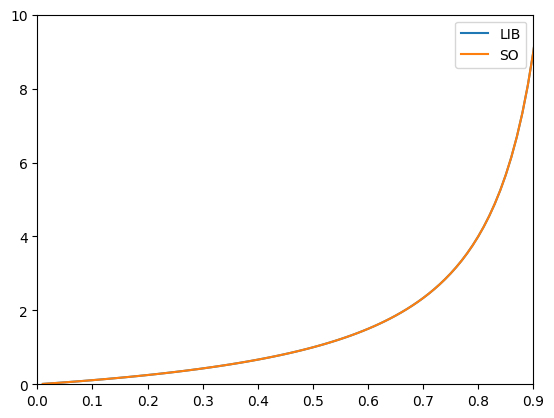

In [13]:
plt.plot(ρ_values, analytical_waiting_times, label = "M/M/1")
# MM1_waiting_time
plt.plot(ρ_values, analytical_waiting_times_MMn, label = "M/M/n=1")
# MMn_mean_waiting_time(λ, μ, n = 1)
plt.xlim(0, 0.9)
plt.ylim(0, 10)
plt.legend()
plt.show()

In [4]:
server_counts = np.array([1,2,4])
mean_waiting_times = [[MMn_mean_waiting_time(n*λ, μ, n) for λ in λ_values] for n in server_counts]

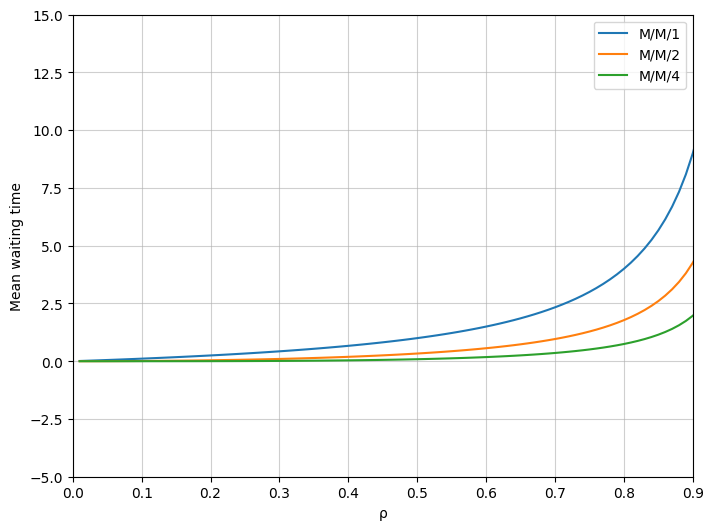

In [5]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for i,wtimes in enumerate(mean_waiting_times):
    ax.plot(ρ_values, wtimes, label = f"M/M/{server_counts[i]}")
ax.set_xlabel("ρ")
ax.set_ylabel("Mean waiting time")
ax.grid(alpha = 0.6)
ax.legend()
ax.set_xlim(0, 0.9)
ax.set_ylim(-5, 15)
plt.show()

In [6]:
MM1_waiting_time(0.9, 1)

9.000000000000002

In [7]:
MMn_mean_waiting_time(0.9, 1, 1)

9.000000000000004